In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
#how to read
#fileObj = open('data/r76-80V-naitrig-100eV-goodchi.pkl', 'rb')
fileObj = open('../example_scripts/data/r76-80V-naitrig-100eV-goodchi-evshift.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
#print(exampleObj)

In [3]:
import pulseAnalysis as pa

pulse_struct = pa.parseEventList('data/r76-80V-naitrig-100eV-goodchi.txt')

   SeriesNumber  EventNumber
0   72209162200       490759
1   72209162200       590105
2   72209162200       970769
3   72209162200       990193
4   72209162200      1200805
5   72209162200      1920692
6   72209162200      2640676
7   72209162200      3320285
8   72209162200      3470461
9   72209162200      5310198
[72208301829 72208302118 72208311151 72209162200 72209171225 72209172155
 72210191832 72210192240 72210200954 72210251956 72210261049 72210262224
 72210270959]
[550152 610538 620687]
[  70193  340676  530225  580726  920658 1220460 2520826 2560339 2690376
 3360712 3400635 3950868 4010638 4240150 5020188 6020421 6110497 6280605]
[1320198 1630263 1950136 2970369 3650606 3670094]
[ 490759  590105  970769  990193 1200805 1920692 2640676 3320285 3470461
 5310198]
[1500320 1970453 2280315 2920809 3240861 4530720 4950597 5080366]
[1220647 1520104]
[ 500590  680460 1000312 1000698 1430424 1560356 1640702 1690511 1931161]
[ 300587 1451328 1580294 1840013 2331140 2840178 3130642 319

72208301829
550152
[3075 3076 3077 ... 3073 3073 3073]


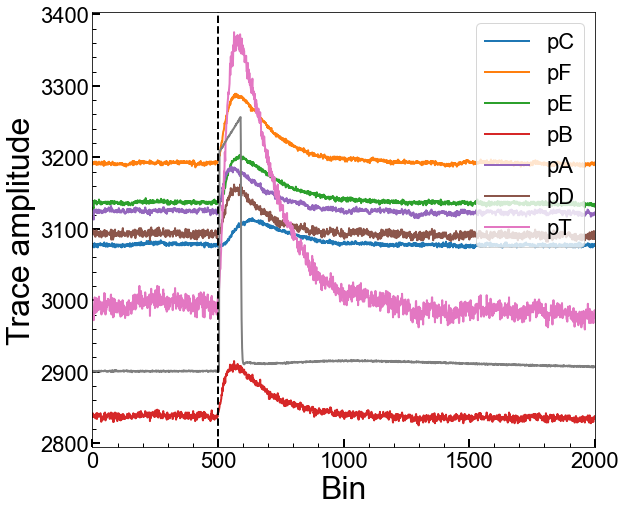

72208301829
610538
[3204 3147 3148 ... 3140 3146 3143]


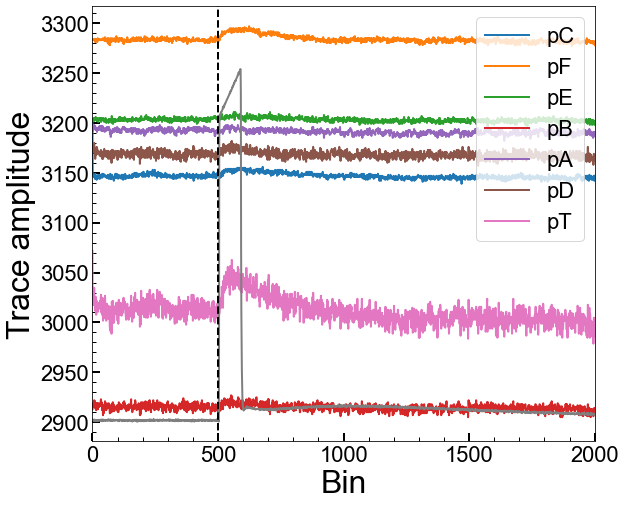

72208301829
620687
[3058 3055 3058 ... 3051 3049 3049]


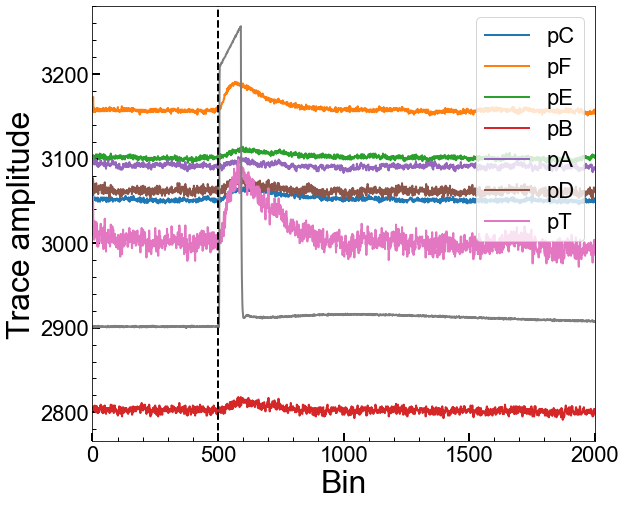

72208302118
70193
[3048 3051 3046 ... 3043 3042 3043]


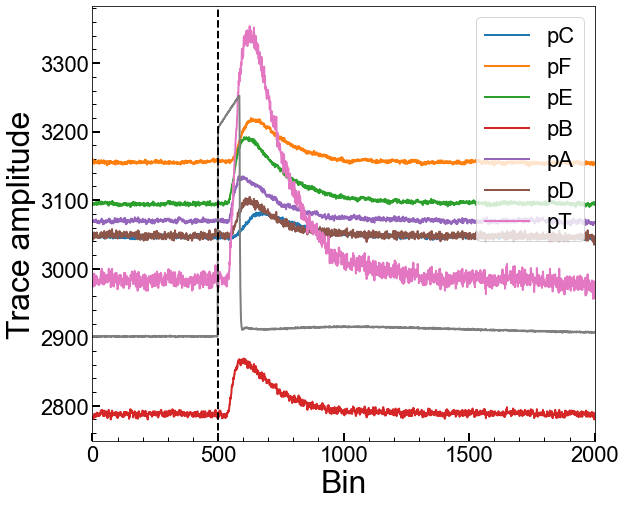

72208302118
340676
[3070 3068 3067 ... 3059 3058 3058]


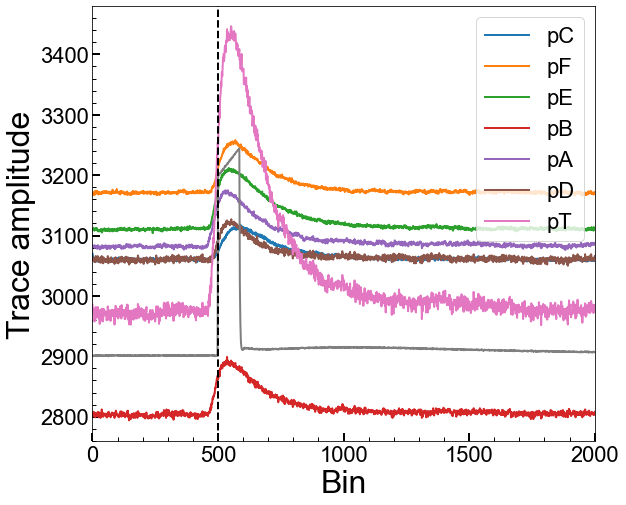

72208302118
530225
[3074 3075 3075 ... 3071 3072 3072]


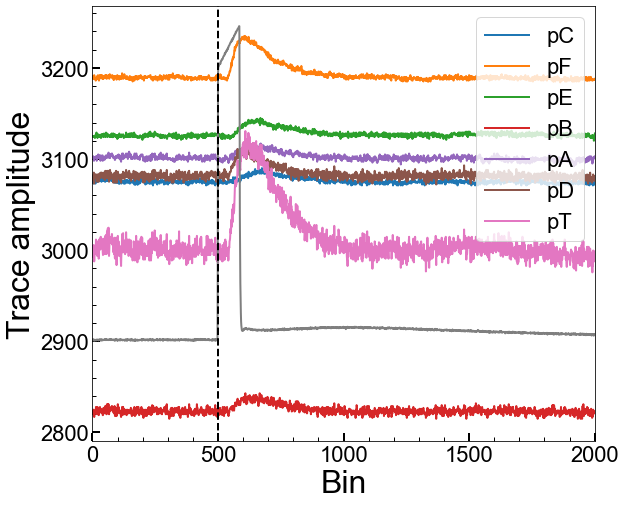

72208302118
580726
[3042 3041 3044 ... 3041 3040 3043]


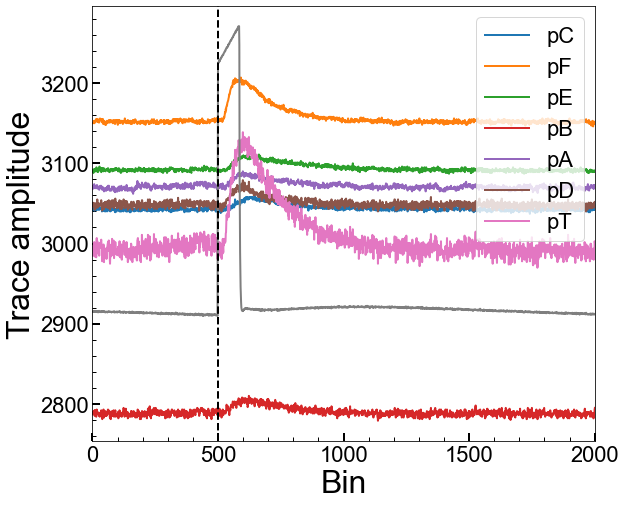

72208302118
920658
[3079 3081 3081 ... 3077 3079 3078]


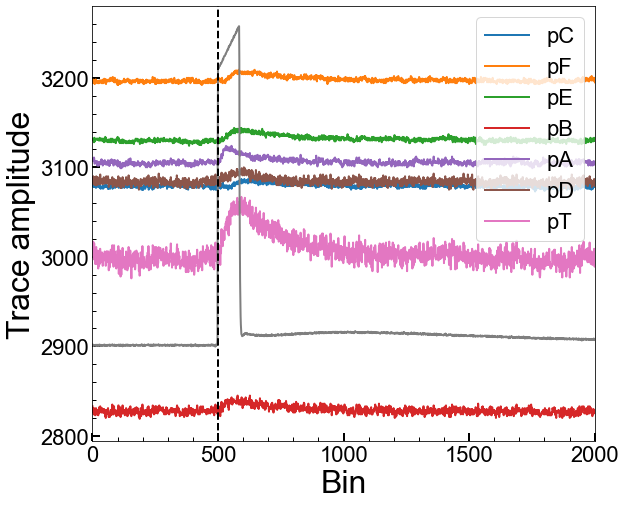

72208302118
1220460
[3127 3132 3127 ... 3161 3162 3161]


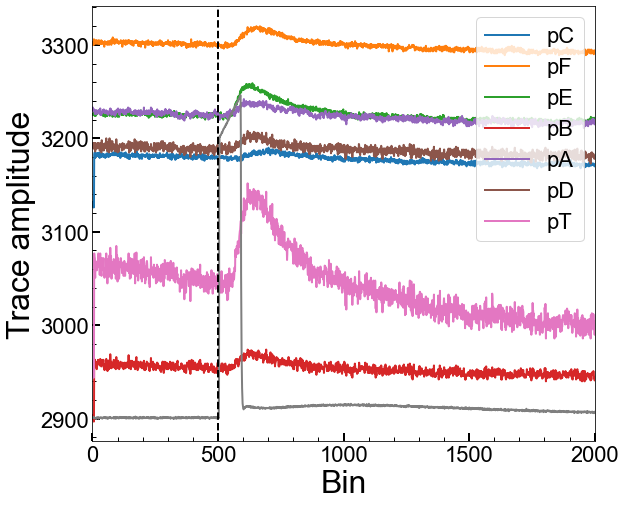

72208302118
2520826
[3148 3146 3147 ... 3148 3147 3148]


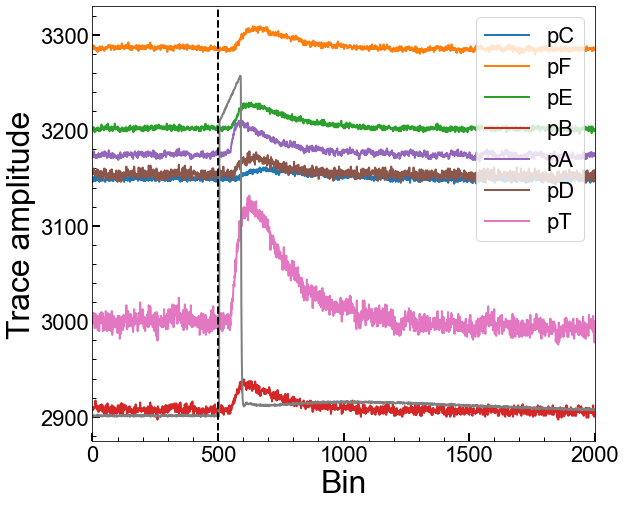

72208302118
2560339
[3104 3103 3103 ... 3103 3102 3101]


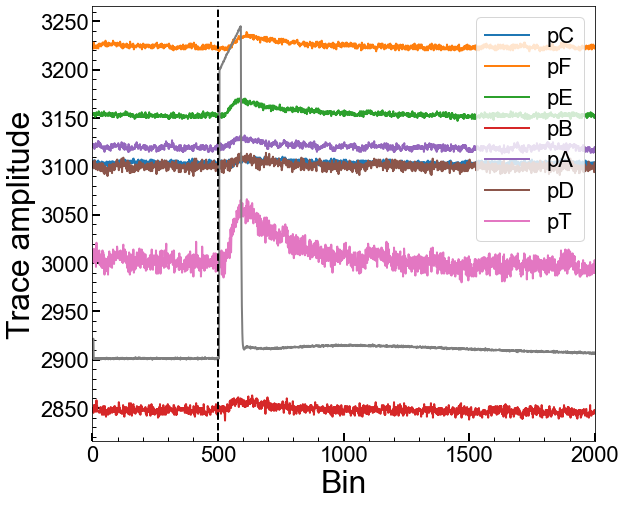

72208302118
2690376
[3090 3090 3087 ... 3088 3089 3084]


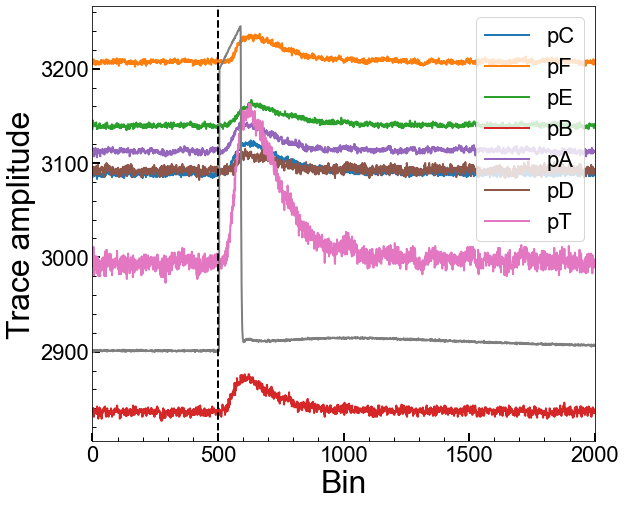

72208302118
3360712
[3223 3217 3219 ... 3200 3199 3200]


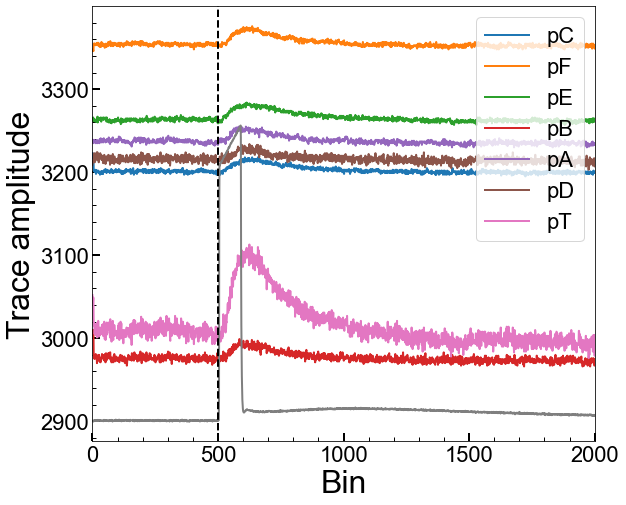

72208302118
3400635
[3046 3043 3045 ... 3044 3046 3047]


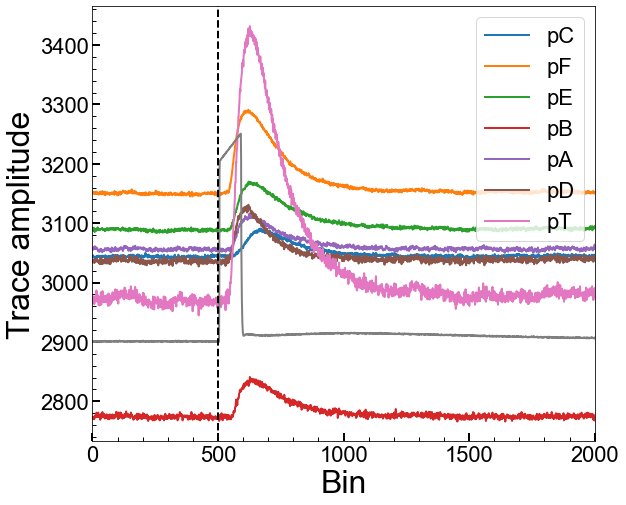

72208302118
3950868
[3091 3088 3092 ... 3087 3087 3087]


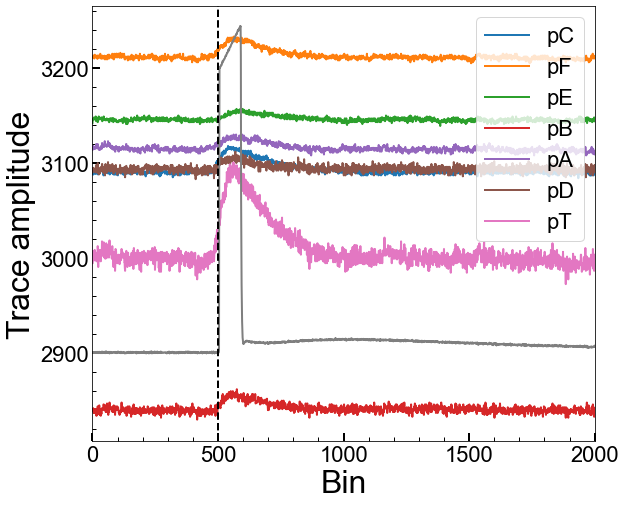

72208302118
4010638
[3205 3206 3208 ... 3199 3199 3203]


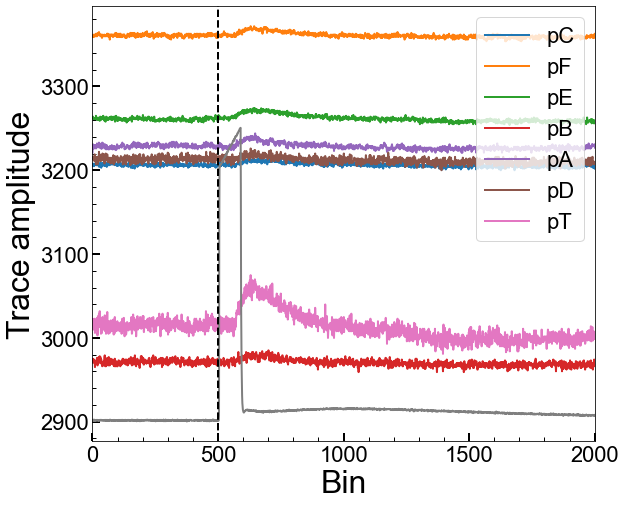

72208302118
4240150
[3109 3106 3109 ... 3107 3108 3106]


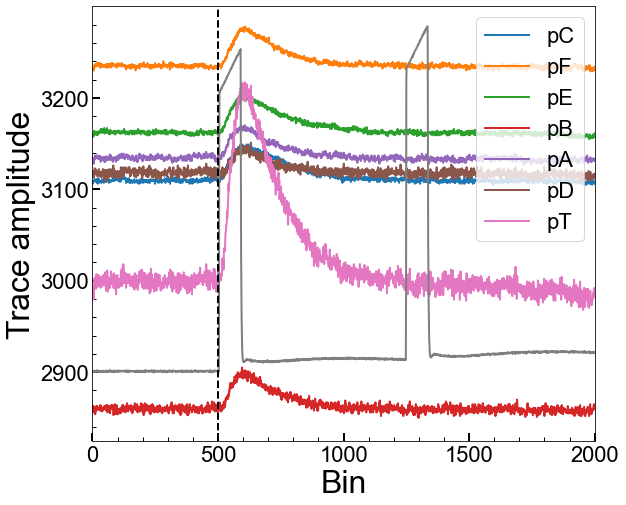

72208302118
5020188
[3143 3143 3141 ... 3124 3125 3125]


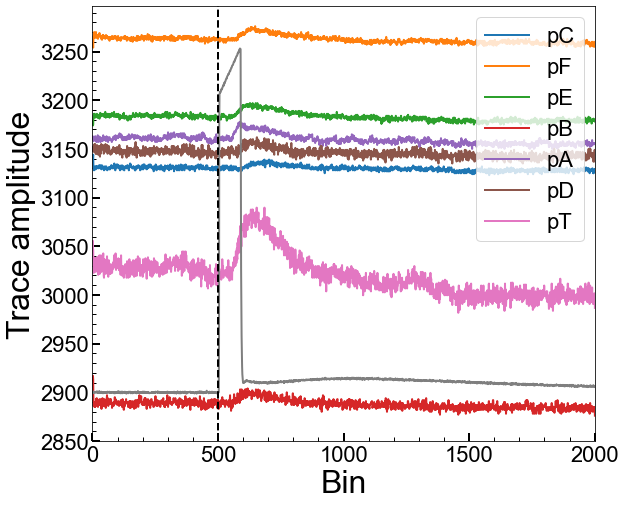

72208302118
6020421
[3072 3073 3071 ... 3067 3069 3069]


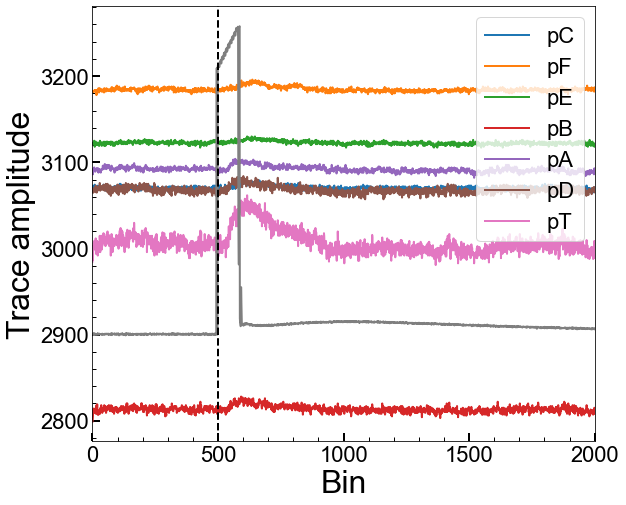

72208302118
6110497
[3183 3185 3186 ... 3178 3180 3181]


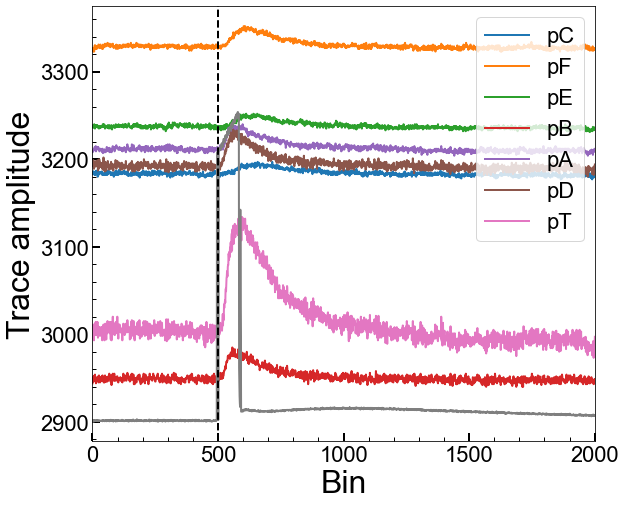

72208302118
6280605
[3147 3144 3142 ... 3154 3154 3153]


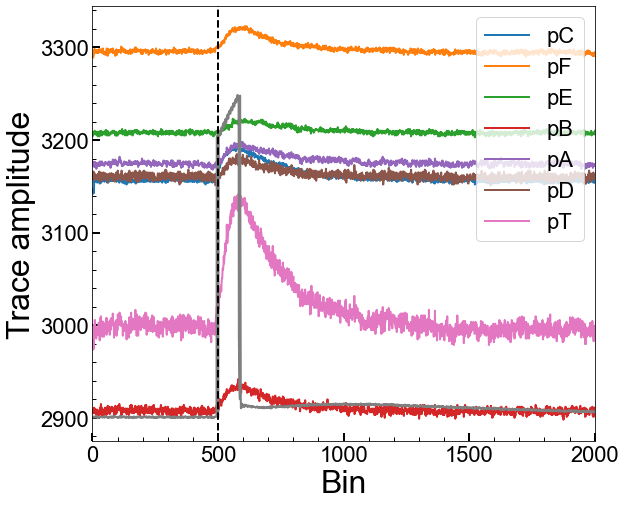

72208311151
1320198
[3077 3078 3079 ... 3075 3075 3076]


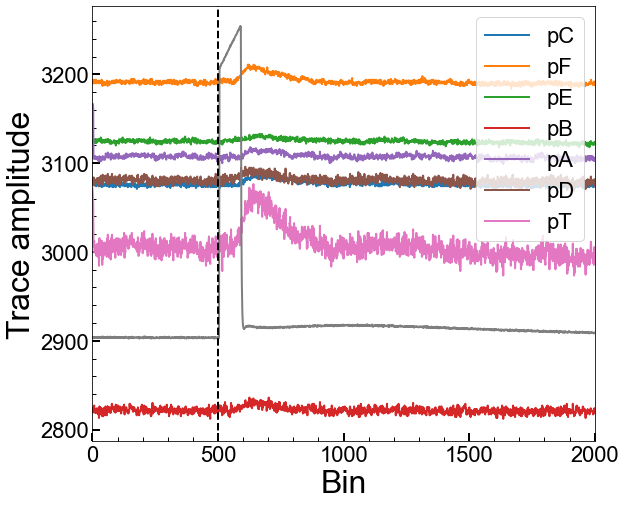

72208311151
1630263
[3093 3096 3095 ... 3091 3093 3090]


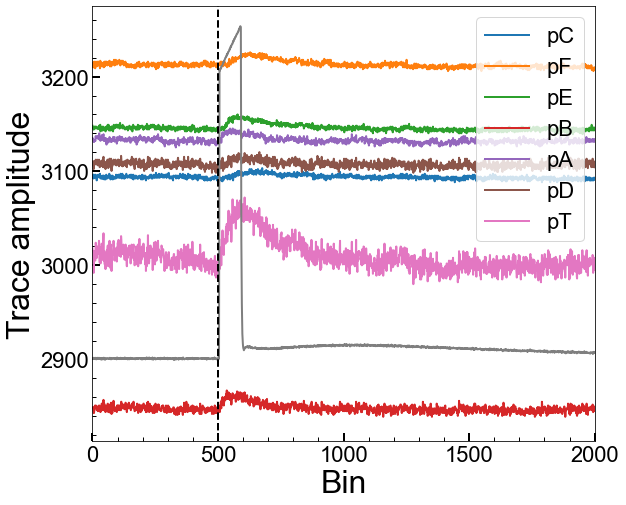

72208311151
1950136
[3171 3171 3171 ... 3170 3167 3172]


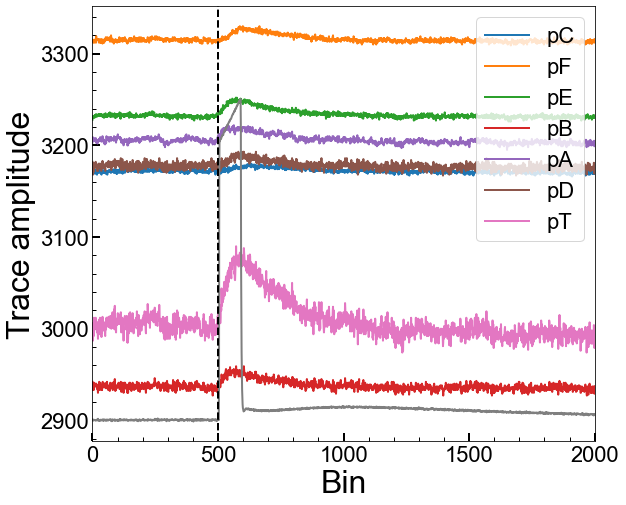

72208311151
2970369
[3144 3146 3148 ... 3136 3138 3137]


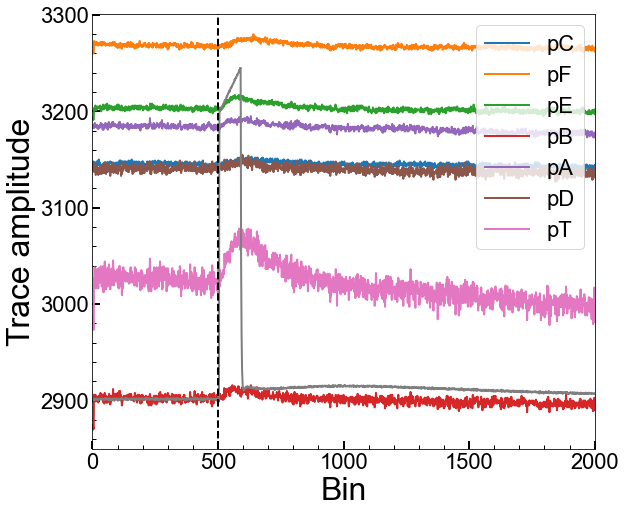

72208311151
3650606
[3113 3113 3111 ... 3103 3107 3102]


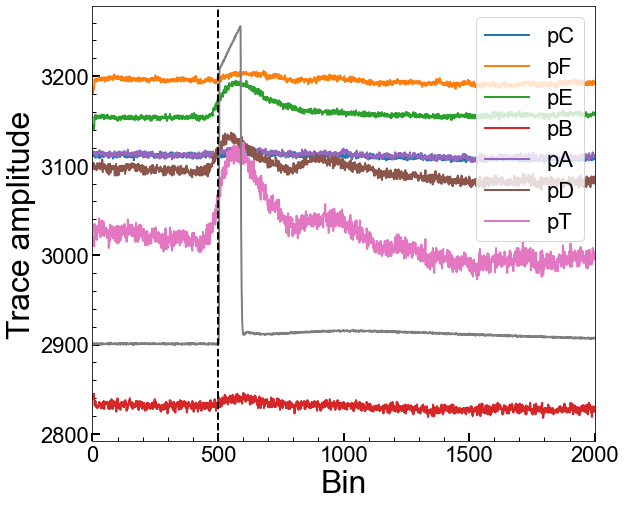

72208311151
3670094
[3157 3157 3157 ... 3153 3154 3153]


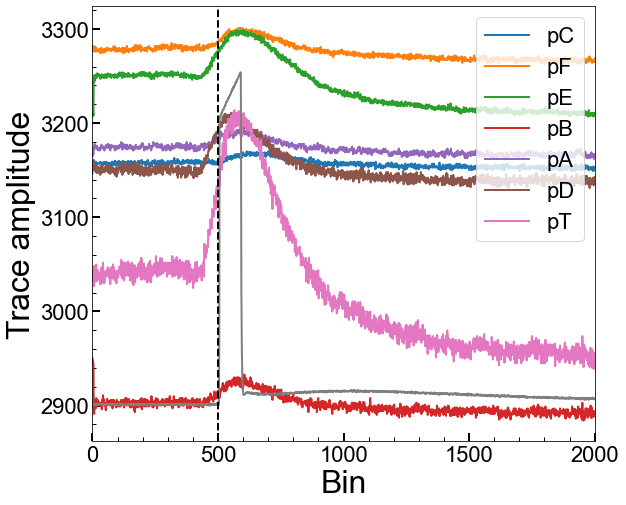

72209162200
490759
[3168 3167 3166 ... 3144 3143 3145]


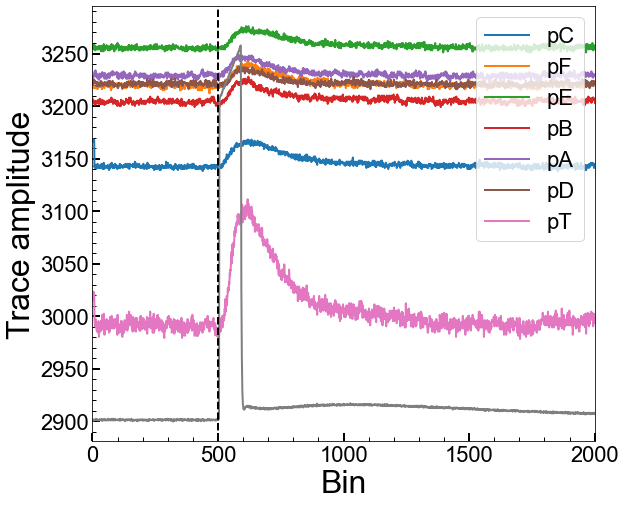

72209162200
590105
[3141 3142 3142 ... 3137 3134 3133]


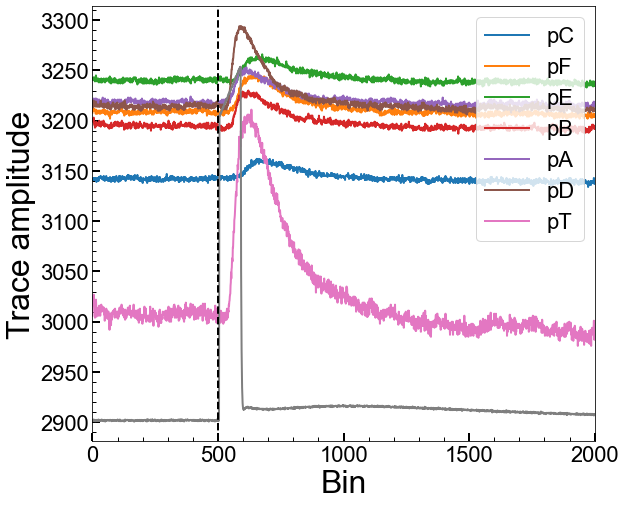

72209162200
970769
[3098 3099 3101 ... 3098 3099 3098]


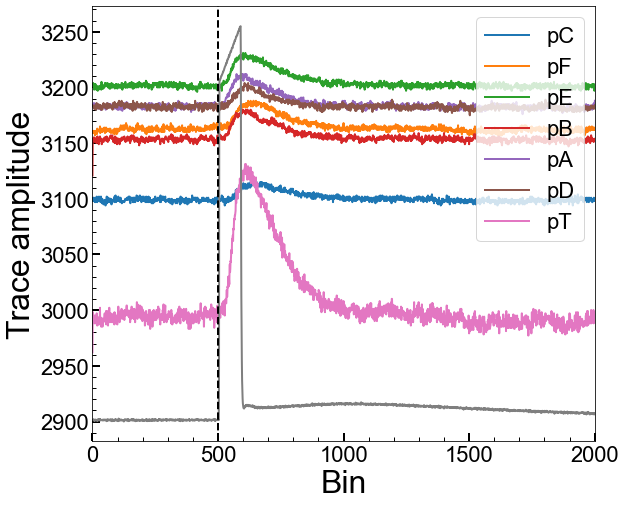

72209162200
990193
[3178 3176 3177 ... 3168 3165 3168]


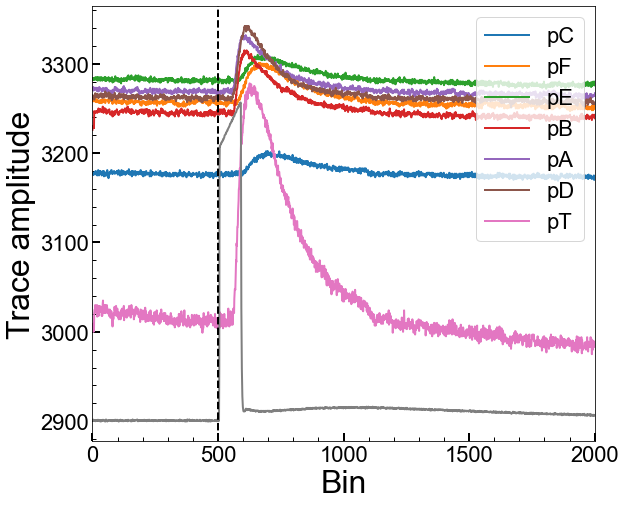

72209162200
1200805
[3177 3179 3178 ... 3168 3169 3168]


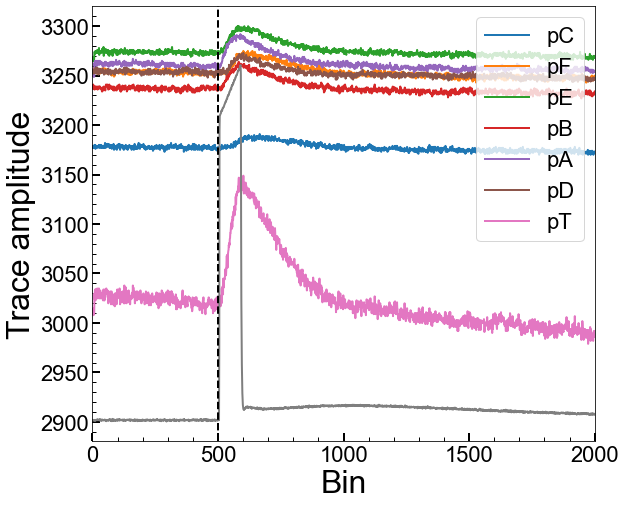

In [ ]:
for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
      print(ser)
      print(ev)
      fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
      ax1 = axes
      print(exampleObj['Z1']['PA'][ser,ev])
      shownpulses=0

      #plt.subplot(8,12)
      if(not pa.isRailed(exampleObj['Z1']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PA'][ser,ev],label="pC") # index 0 corresponds to first event
      if(not pa.isRailed(exampleObj['Z1']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PB'][ser,ev],label="pF")
      if(not pa.isRailed(exampleObj['Z1']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z1']['PD'][ser,ev],label="pE")
      if(not pa.isRailed(exampleObj['Z3']['PA'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PA'][ser,ev],label="pB") # index 0 corresponds to first event
      if(not pa.isRailed(exampleObj['Z3']['PB'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PB'][ser,ev],label="pA")
      if(not pa.isRailed(exampleObj['Z3']['PD'][ser,ev])):
        shownpulses+=1
        ax1.plot(exampleObj['Z3']['PD'][ser,ev],label="pD")

      if(shownpulses>0):
        ax1.plot(pa.getPTPulse(exampleObj,ser,ev)+3000,label="pT")

      ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
      #plt.title('PA')
      ax1.legend(loc=1,prop={'size':22})
      ax1.set_xlim(0,2000)
      ax1.set_xlabel('Bin')
      ax1.set_ylabel('Trace amplitude')
      plt.axvline(x=500,color='k',linestyle="--")

      #plt.suptitle('Event 0 on Z1 PA Channels')
      if(shownpulses>0):
        plt.show()